In [5]:
# Suppress warnings thrown by different packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Set Pandas Options to Display all rows & columns when displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Read the Dataset
df = pd.read_csv(r"C:\Users\Ashis\Desktop\ML Project\Project 1\books_features_enhanced.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# Selected features based on EDA
cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'curr_age', 'num_authors', 
       'langs', 'single_author', 'double_author', 'triple_author', 'multi_author', 'IsAudio', 'books_cnt', 'num_lng_iso', 
        'num_publishers', 'chgs_authors', 'num_ratings', 'num_langs', 'num_txrvws', 'times_published', 'oldest_pub_age', 
        'last_pub_age', 'first_pub_lang', 'max_pages', 'min_pages', 'med_pages', 'pub_intvl', 'auth_cat', 'IsClass', 'IsBio',
       'IsAuto', 'IsAuBio', 'IsBuss', 'IsPolit', 'IsPhil', 'IsHist', 'HasStories', 'IsAntho', 'IsColl', 'IsPlay', 'IsPoem',
        'HasParts', 'tot_rvws', 'decade', 'year', 'month', 'week', 'pop_idx', 'lit_idx', 'gpc_idx']

In [8]:
df[cols].head()

,average_rating,num_pages,ratings_count,text_reviews_count,curr_age,num_authors,langs,single_author,double_author,triple_author,multi_author,IsAudio,books_cnt,num_lng_iso,num_publishers,chgs_authors,num_ratings,num_langs,num_txrvws,times_published,oldest_pub_age,last_pub_age,first_pub_lang,max_pages,min_pages,med_pages,pub_intvl,auth_cat,IsClass,IsBio,IsAuto,IsAuBio,IsBuss,IsPolit,IsPhil,IsHist,HasStories,IsAntho,IsColl,IsPlay,IsPoem,HasParts,tot_rvws,decade,year,month,week,pop_idx,lit_idx,gpc_idx
0,3.88,144,332,33,1512.0,2,eng,0,1,0,0,0,1.0,1.0,1.0,1.0,332.0,1.0,33.0,1.0,1512.0,1512.0,eng,144.0,144.0,144.0,0.0,double,0,0,0,0,0,0,0,0,0,0,0,0,0,0,365,1900,1900,1,1,100,21,100
1,3.96,448,111,11,1353.0,2,eng,0,1,0,0,0,1.0,1.0,1.0,1.0,111.0,1.0,11.0,1.0,1353.0,1353.0,eng,448.0,448.0,448.0,0.0,double,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,1910,1913,1,1,109,26,100
2,3.95,384,87,7,1341.0,6,mul,0,0,0,1,0,1.0,1.0,1.0,1.0,87.0,1.0,7.0,1.0,1341.0,1341.0,mul,384.0,384.0,384.0,0.0,multiple,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,1910,1914,1,1,109,26,100
3,4.32,496,208,7,1280.0,2,mul,0,1,0,0,0,1.0,1.0,1.0,1.0,208.0,1.0,7.0,1.0,1280.0,1280.0,mul,496.0,496.0,496.0,0.0,double,0,0,0,0,0,1,0,0,0,0,0,0,0,0,215,1910,1919,1,1,109,26,100
4,3.93,464,21,2,1256.0,2,mul,0,1,0,0,0,1.0,1.0,1.0,1.0,21.0,1.0,2.0,1.0,1256.0,1256.0,mul,464.0,464.0,464.0,0.0,double,0,0,0,0,0,0,0,0,0,0,1,0,0,0,23,1920,1921,1,53,117,32,101


In [9]:
# Setting rare languages to a seperate category - 'oth'
test = df.groupby('langs')['isbn'].count().reset_index()
rare_lang = test[test.isbn<10].langs.to_list()
df.loc[df.langs.isin(rare_lang), 'langs'] = 'oth'

# Label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.langs = le.fit_transform(df.langs)
df.year = le.fit_transform(df.year)
df.month = le.fit_transform(df.month)
df.week = le.fit_transform(df.week)
df.langs = le.fit_transform(df.langs)
df.auth_cat =le.fit_transform(df.auth_cat)
df.first_pub_lang = le.fit_transform(df.first_pub_lang)
df[cols].head()

,average_rating,num_pages,ratings_count,text_reviews_count,curr_age,num_authors,langs,single_author,double_author,triple_author,multi_author,IsAudio,books_cnt,num_lng_iso,num_publishers,chgs_authors,num_ratings,num_langs,num_txrvws,times_published,oldest_pub_age,last_pub_age,first_pub_lang,max_pages,min_pages,med_pages,pub_intvl,auth_cat,IsClass,IsBio,IsAuto,IsAuBio,IsBuss,IsPolit,IsPhil,IsHist,HasStories,IsAntho,IsColl,IsPlay,IsPoem,HasParts,tot_rvws,decade,year,month,week,pop_idx,lit_idx,gpc_idx
0,3.88,144,332,33,1512.0,2,0,0,1,0,0,0,1.0,1.0,1.0,1.0,332.0,1.0,33.0,1.0,1512.0,1512.0,0,144.0,144.0,144.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,365,1900,0,0,0,100,21,100
1,3.96,448,111,11,1353.0,2,0,0,1,0,0,0,1.0,1.0,1.0,1.0,111.0,1.0,11.0,1.0,1353.0,1353.0,0,448.0,448.0,448.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,1910,1,0,0,109,26,100
2,3.95,384,87,7,1341.0,6,5,0,0,0,1,0,1.0,1.0,1.0,1.0,87.0,1.0,7.0,1.0,1341.0,1341.0,5,384.0,384.0,384.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,1910,2,0,0,109,26,100
3,4.32,496,208,7,1280.0,2,5,0,1,0,0,0,1.0,1.0,1.0,1.0,208.0,1.0,7.0,1.0,1280.0,1280.0,5,496.0,496.0,496.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,215,1910,3,0,0,109,26,100
4,3.93,464,21,2,1256.0,2,5,0,1,0,0,0,1.0,1.0,1.0,1.0,21.0,1.0,2.0,1.0,1256.0,1256.0,5,464.0,464.0,464.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,23,1920,4,0,52,117,32,101


In [10]:
# Splitting Dataset in two parts for training & testing
from sklearn.model_selection import train_test_split

y = df.loc[(df.ratings_count>20) , cols].average_rating
X = df.loc[(df.ratings_count>20) , cols].drop(['average_rating'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1111)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8485, 49), (8485,), (1498, 49), (1498,))

In [436]:
# Trying out eligible algorithms for creating a model

from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

lx = df[cols].drop('average_rating', axis=1)
ly = df[cols].average_rating
offset = int(lx.shape[0] * 0.9)
lx_train, ly_train = lx[:offset], ly[:offset]
lx_test, ly_test = lx[offset:], ly[offset:]
reg = LazyRegressor(verbose=1,ignore_warnings=False, custom_metric=None )
models,prediction = reg.fit(lx_train, lx_test, ly_train, ly_test)

  2%|█▉                                                                                 | 1/42 [00:00<00:26,  1.56it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.0017237907056883994, 'Adjusted R-Squared': -0.03649219863237585, 'RMSE': 0.3359847173105116, 'Time taken': 0.6417226791381836}


  7%|█████▉                                                                             | 3/42 [00:02<00:34,  1.12it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.015423477738634395, 'Adjusted R-Squared': -0.022268060461847483, 'RMSE': 0.33367133626804124, 'Time taken': 2.1500608921051025}
{'Model': 'BayesianRidge', 'R-Squared': 0.03932106352416431, 'Adjusted R-Squared': 0.002544372211830681, 'RMSE': 0.3295970356813854, 'Time taken': 0.12642288208007812}


 14%|███████████▊                                                                       | 6/42 [00:03<00:12,  2.86it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.6740271393570125, 'Adjusted R-Squared': -0.7381122119187657, 'RMSE': 0.4350863016083817, 'Time taken': 0.2970242500305176}
{'Model': 'DummyRegressor', 'R-Squared': -0.00022044058585501958, 'Adjusted R-Squared': -0.03851085894628459, 'RMSE': 0.33631173815271664, 'Time taken': 0.06766939163208008}
{'Model': 'ElasticNet', 'R-Squared': -0.00022044058585501958, 'Adjusted R-Squared': -0.03851085894628459, 'RMSE': 0.33631173815271664, 'Time taken': 0.06734132766723633}


 19%|███████████████▊                                                                   | 8/42 [00:07<00:31,  1.08it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.040347948301816094, 'Adjusted R-Squared': 0.003610568171446671, 'RMSE': 0.32942083286271656, 'Time taken': 3.55460524559021}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.5321109286649972, 'Adjusted R-Squared': -0.5907631677642176, 'RMSE': 0.41623564408950126, 'Time taken': 0.15739846229553223}


 21%|█████████████████▊                                                                 | 9/42 [00:14<01:27,  2.66s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.029074062462610017, 'Adjusted R-Squared': -0.008094904333872721, 'RMSE': 0.3313501826602284, 'Time taken': 6.951392650604248}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 26%|█████████████████████▍                                                            | 11/42 [00:37<03:27,  6.69s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -43743.48395705982, 'Adjusted R-Squared': -45418.109393324485, 'RMSE': 70.33246060355178, 'Time taken': 23.129253387451172}


 29%|███████████████████████▍                                                          | 12/42 [00:41<03:01,  6.06s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.17824577506612016, 'Adjusted R-Squared': 0.14678739670730678, 'RMSE': 0.3048352148039256, 'Time taken': 4.072833776473999}


 31%|█████████████████████████▍                                                        | 13/42 [00:43<02:26,  5.07s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.1878716214859285, 'Adjusted R-Squared': 0.15678173958202846, 'RMSE': 0.3030445695618681, 'Time taken': 2.1660385131835938}


 33%|███████████████████████████▎                                                      | 14/42 [00:44<01:53,  4.06s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.037117820772266, 'Adjusted R-Squared': 0.0002567849661622157, 'RMSE': 0.32997477186795665, 'Time taken': 1.325052261352539}


 36%|█████████████████████████████▎                                                    | 15/42 [00:45<01:21,  3.00s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.06720106910401658, 'Adjusted R-Squared': -0.10805563850949262, 'RMSE': 0.34738998077396877, 'Time taken': 0.23618483543395996}


 38%|███████████████████████████████▏                                                  | 16/42 [00:53<01:58,  4.57s/it]

{'Model': 'KernelRidge', 'R-Squared': -138.59046977143927, 'Adjusted R-Squared': -143.9342692678249, 'RMSE': 3.9730318553755346, 'Time taken': 8.517755270004272}
{'Model': 'Lars', 'R-Squared': -0.07703567596911043, 'Adjusted R-Squared': -0.11826673359257778, 'RMSE': 0.3489869661666474, 'Time taken': 0.07863569259643555}


 43%|███████████████████████████████████▏                                              | 18/42 [00:54<01:02,  2.61s/it]

{'Model': 'LarsCV', 'R-Squared': 0.041942317451643785, 'Adjusted R-Squared': 0.0052659729283173196, 'RMSE': 0.32914706866682236, 'Time taken': 0.3004176616668701}
{'Model': 'Lasso', 'R-Squared': -0.00022044058585501958, 'Adjusted R-Squared': -0.03851085894628459, 'RMSE': 0.33631173815271664, 'Time taken': 0.07665443420410156}


 48%|███████████████████████████████████████                                           | 20/42 [00:57<00:50,  2.31s/it]

{'Model': 'LassoCV', 'R-Squared': 0.04042886946067448, 'Adjusted R-Squared': 0.0036945871524461937, 'RMSE': 0.32940694362156986, 'Time taken': 3.6305787563323975}
{'Model': 'LassoLars', 'R-Squared': -0.00022044058585501958, 'Adjusted R-Squared': -0.03851085894628459, 'RMSE': 0.33631173815271664, 'Time taken': 0.06252098083496094}


 57%|██████████████████████████████████████████████▊                                   | 24/42 [00:58<00:18,  1.05s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.04034242581629521, 'Adjusted R-Squared': 0.003604834274248514, 'RMSE': 0.3294217807162429, 'Time taken': 0.2521488666534424}
{'Model': 'LassoLarsIC', 'R-Squared': 0.03690603954630545, 'Adjusted R-Squared': 3.689633565973072e-05, 'RMSE': 0.3300110580414241, 'Time taken': 0.09464597702026367}
{'Model': 'LinearRegression', 'R-Squared': -0.009380694399243161, 'Adjusted R-Squared': -0.04802178540799118, 'RMSE': 0.3378482392210838, 'Time taken': 0.07856321334838867}


 60%|████████████████████████████████████████████████▊                                 | 25/42 [00:59<00:17,  1.03s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.021551567730883514, 'Adjusted R-Squared': -0.0159053750543956, 'RMSE': 0.33263131572421245, 'Time taken': 0.9577522277832031}


 62%|██████████████████████████████████████████████████▊                               | 26/42 [02:02<03:53, 14.56s/it]

{'Model': 'MLPRegressor', 'R-Squared': -0.8280189015795183, 'Adjusted R-Squared': -0.897999083619444, 'RMSE': 0.4546576509776411, 'Time taken': 63.222530126571655}


 67%|██████████████████████████████████████████████████████▋                           | 28/42 [02:11<02:19,  9.98s/it]

{'Model': 'NuSVR', 'R-Squared': 0.06613017738864135, 'Adjusted R-Squared': 0.0303797920225668, 'RMSE': 0.32496555771815333, 'Time taken': 9.347251892089844}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.041258059602941155, 'Adjusted R-Squared': 0.004555520334706298, 'RMSE': 0.3292645883472702, 'Time taken': 0.09341764450073242}


 69%|████████████████████████████████████████████████████████▌                         | 29/42 [02:12<01:36,  7.39s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.04642257236632141, 'Adjusted R-Squared': 0.009917740869607172, 'RMSE': 0.32837655616648026, 'Time taken': 0.22086405754089355}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -2.008963175417136, 'Adjusted R-Squared': -2.124152241889688, 'RMSE': 0.5833142675517775, 'Time taken': 0.07692289352416992}


 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [02:12<00:46,  4.25s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.038747256526854734, 'Adjusted R-Squared': 0.0019485987468369492, 'RMSE': 0.32969545402170475, 'Time taken': 0.14174818992614746}


 76%|██████████████████████████████████████████████████████████████▍                   | 32/42 [02:21<00:53,  5.31s/it]

QuantileRegressor model failed to execute
Unable to allocate 1.50 GiB for an array with shape (10014, 20112) and data type float64


 79%|████████████████████████████████████████████████████████████████▍                 | 33/42 [02:21<00:37,  4.16s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -1.782939311198617, 'Adjusted R-Squared': -1.8894757367440356, 'RMSE': 0.5609782593990531, 'Time taken': 0.7407252788543701}


 81%|██████████████████████████████████████████████████████████████████▍               | 34/42 [02:43<01:10,  8.79s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.16888580442464207, 'Adjusted R-Squared': 0.13706910786199988, 'RMSE': 0.30656637098727163, 'Time taken': 21.651886224746704}
{'Model': 'Ridge', 'R-Squared': 0.025675366333080207, 'Adjusted R-Squared': -0.011623709278818728, 'RMSE': 0.3319296165491357, 'Time taken': 0.09431815147399902}


 86%|██████████████████████████████████████████████████████████████████████▎           | 36/42 [02:43<00:30,  5.05s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.02753716613695112, 'Adjusted R-Squared': -0.009690636093100391, 'RMSE': 0.3316123290775187, 'Time taken': 0.12549376487731934}
{'Model': 'SGDRegressor', 'R-Squared': 0.016698862289047822, 'Adjusted R-Squared': -0.02094385166627344, 'RMSE': 0.33345515339124565, 'Time taken': 0.07864713668823242}


 95%|██████████████████████████████████████████████████████████████████████████████    | 40/42 [02:50<00:05,  2.92s/it]

{'Model': 'SVR', 'R-Squared': 0.060384608224077874, 'Adjusted R-Squared': 0.02441427109726846, 'RMSE': 0.3259636888409342, 'Time taken': 6.937775373458862}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.009380694399243161, 'Adjusted R-Squared': -0.04802178540799118, 'RMSE': 0.3378482392210838, 'Time taken': 0.09430766105651855}
{'Model': 'TweedieRegressor', 'R-Squared': 0.03210422315890926, 'Adjusted R-Squared': -0.00494874308804194, 'RMSE': 0.33083272356983573, 'Time taken': 0.07865333557128906}


 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [02:52<00:02,  2.59s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.14341639558150798, 'Adjusted R-Squared': 0.11062467963271405, 'RMSE': 0.31122827204853537, 'Time taken': 1.271317958831787}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3270
[LightGBM] [Info] Number of data points in the train set: 10014, number of used features: 41
[LightGBM] [Info] Start training from score 3.934130


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [02:52<00:00,  4.12s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.22367788242691033, 'Adjusted R-Squared': 0.19395873506883676, 'RMSE': 0.29628873688623586, 'Time taken': 0.7072165012359619}


In [437]:
print(models[:10])

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.19       0.22  0.30        0.71
HistGradientBoostingRegressor                0.16       0.19  0.30        2.17
GradientBoostingRegressor                    0.15       0.18  0.30        4.07
RandomForestRegressor                        0.14       0.17  0.31       21.65
XGBRegressor                                 0.11       0.14  0.31        1.27
NuSVR                                        0.03       0.07  0.32        9.35
SVR                                          0.02       0.06  0.33        6.94
OrthogonalMatchingPursuitCV                  0.01       0.05  0.33        0.22
LarsCV                                       0.01       0.04  0.33        0.30
OrthogonalMatchingPursuit                    0.00       0.04  0.33        0.09


In [12]:
from sklearn.ensemble import RandomForestRegressor
 
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=700, max_depth=15, max_features= 0.35, random_state=1111, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.35, n_estimators=700,
                      oob_score=True, random_state=1111)

In [14]:
#Performance metrics for Regression model
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(x_test)
 
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.17466503799179134
Mean Squared Error: 0.0610299055059773
R-squared: 0.1807281443056985


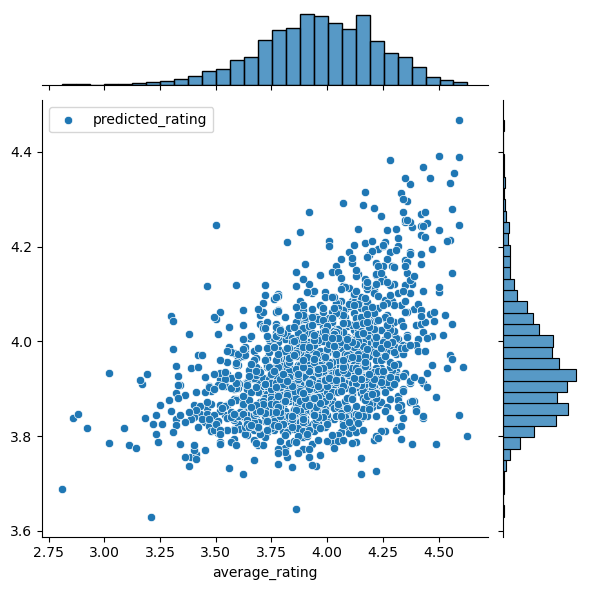

In [67]:
test= pd.DataFrame(columns=['y_test', 'predictions'])

test['y_test'] = y_test
test['predictions'] = predictions

sns.jointplot(test, x = y_test, y = predictions, label='predicted_rating')

In [105]:
# Checking LightGBM model performance with cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = lgb.LGBMRegressor(verbose=0)

# Mean CV score is less than 0.2
scores = cross_val_score(model, x_train, y_train, scoring='r2', cv=10)

np.mean(scores) 

0.1850438464102269

In [100]:
# Using the Grid Search CV to estimate best hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.07, 0.1, 0.12],
              'max_depth': [7, 12, 15],
              'feature_fraction': [0.3, 0.4],
             'min_child_samples': [15,20]}

# feature_fraction=0.4, learning_rate=0.12, max_depth=12, min_child_samples=20, n_estimators=200,

# Initialize LGBMRegressor estimator

estimator = lgb.LGBMRegressor()

# Initalise Grid Search with 3-fold cross validation and fit model
model = GridSearchCV(estimator=estimator, param_grid=param_grid,  cv=5, n_jobs=-1, scoring='r2' )

model.fit(x_train, y_train)

# Print best parameters

best_params = model.best_estimator_
print(best_params)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3538
[LightGBM] [Info] Number of data points in the train set: 8485, number of used features: 49
[LightGBM] [Info] Start training from score 3.947118
LGBMRegressor(feature_fraction=0.4, learning_rate=0.12, max_depth=15,
              min_child_samples=15)


In [102]:
# Fitting LightGBM Model & checking the performance

import lightgbm as lgb
from lightgbm import LGBMRegressor
 
# Fitting the Best Model
model = LGBMRegressor(feature_fraction=0.4, learning_rate=0.12, max_depth=15,  min_child_samples=15)

model.fit(x_train, y_train)
 
# Predicting the Target variable
pred = model.predict(x_test)

# print(pred)
accuracy = model.score(x_test, y_test)

print(accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3538
[LightGBM] [Info] Number of data points in the train set: 8485, number of used features: 49
[LightGBM] [Info] Start training from score 3.947118
0.21676135268832009


In [409]:
# !pip install shap
import shap

explainer = shap.Explainer(model, x_test)
shap_values = explainer(x_test)

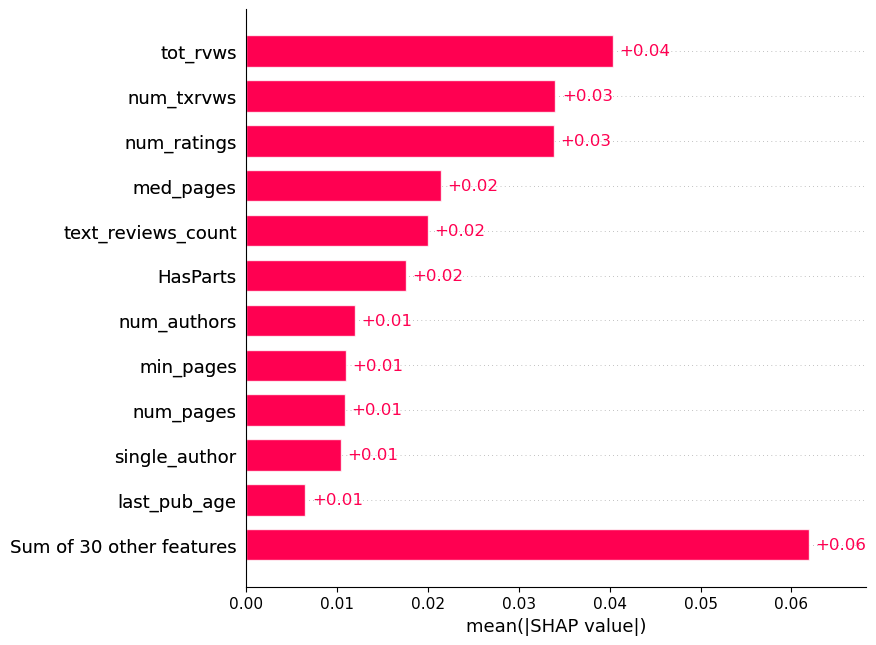

In [516]:
shap.plots.bar(shap_values, max_display=12)